In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [2]:
train1 = pd.read_csv('student-mat.csv')
train2 = pd.read_csv('student-por.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import tensorflow as tf
from ucimlrepo import fetch_ucirepo

# Fetch dataset
student_performance = fetch_ucirepo(id=320)

# Extract features and targets
X = student_performance.data.features
y = student_performance.data.targets

# Convert features and targets to pandas DataFrames
X_df = pd.DataFrame(X, columns=student_performance.metadata.features)
y_df = pd.DataFrame(y, columns=student_performance.metadata.targets)

# Concatenate features and targets into a single DataFrame
student_df = pd.concat([X_df, y_df], axis=1)

# Display metadata
print(student_performance.metadata)

# Display variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [4]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
data = student_df.copy()

In [6]:
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'A'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'B' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'C' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'D' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'F' 
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,C
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,C


In [7]:
# Calculate the average of "G1" and "G2" features
average_MIDGRADE = (data['G1'] + data['G2']) / 2

# Round the average values to the nearest integer
rounded_MIDGRADE = np.where(average_MIDGRADE - np.floor(average_MIDGRADE) >= 0.5, np.ceil(average_MIDGRADE), np.floor(average_MIDGRADE))

# Create a new feature 'midgrade'
data['MIDGRADE'] = rounded_MIDGRADE.astype(int)

In [8]:
data.loc[(data.MIDGRADE >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'A'
data.loc[(data.MIDGRADE >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'B' 
data.loc[(data.MIDGRADE >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'C' 
data.loc[(data.MIDGRADE >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'D' 
data.loc[(data.MIDGRADE >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'F'

In [9]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,FinalGrade,MIDGRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,C,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,C,10
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,C,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,C,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,C,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,D,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,B,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,D,12
647,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,D,10


In [10]:
# label encode final_grade
le = preprocessing.LabelEncoder()
data.FinalGrade = le.fit_transform(data.FinalGrade)

In [11]:
X = data.drop(labels=['FinalGrade','G3','G1','G2'],axis=1)

y = data.FinalGrade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [12]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [13]:
len(list(X_train))

57

In [14]:
# Decision Tree Model model
tree = DecisionTreeClassifier(min_samples_leaf=8)
t= tree.fit(X_train, y_train)
print("Decision Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decision Tree Model Score : 0.8744493392070485 , Cross Validation Score : 0.8051282051282052


In [15]:
# find a good # of estimators

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

41    0.810256
42    0.810256
dtype: float64

In [43]:
# find a good # of min_samples_leaf


ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=26, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

0    0.774359
dtype: float64

In [44]:
# Random Forest Model
#n_estimators: This parameter specifies the number of decision trees in the forest. 
#min_samples_leaf: This parameter specifies the minimum number of samples required to be at a leaf node. It controls the depth of the trees and prevents overfitting by setting a threshold for how many samples should be present at the end nodes.
#Overall, a test accuracy of 0.96 and a cross-validation score of 0.75 indicate that your Random Forest model performs well and generalizes effectively


forest = RandomForestClassifier(n_estimators=26, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Random Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Random Forest Model Score : 0.9713656387665198 , Cross Validation Score : 0.7538461538461538


In [45]:
#SVC Model
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.7687224669603524 , Cross Validation Score : 0.7743589743589744


In [46]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [47]:
# find optimal number of features to use in the model


ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))
ks

1     0.728205
2     0.800000
3     0.779487
4     0.779487
5     0.789744
6     0.805128
7     0.276923
8     0.035897
9     0.251282
10    0.041026
11    0.246154
12    0.246154
13    0.256410
14    0.251282
15    0.251282
16    0.251282
17    0.748718
18    0.302564
19    0.302564
20    0.302564
21    0.302564
22    0.302564
23    0.020513
24    0.020513
25    0.020513
26    0.020513
27    0.020513
28    0.020513
29    0.020513
30    0.020513
31    0.020513
32    0.020513
33    0.020513
34    0.020513
35    0.020513
36    0.312821
37    0.307692
38    0.307692
39    0.302564
40    0.497436
41    0.112821
42    0.789744
43    0.794872
44    0.312821
45    0.312821
46    0.312821
47    0.312821
48    0.312821
49    0.769231
50    0.251282
51    0.241026
52    0.246154
53    0.794872
54    0.794872
55    0.794872
56    0.794872
57         NaN
dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

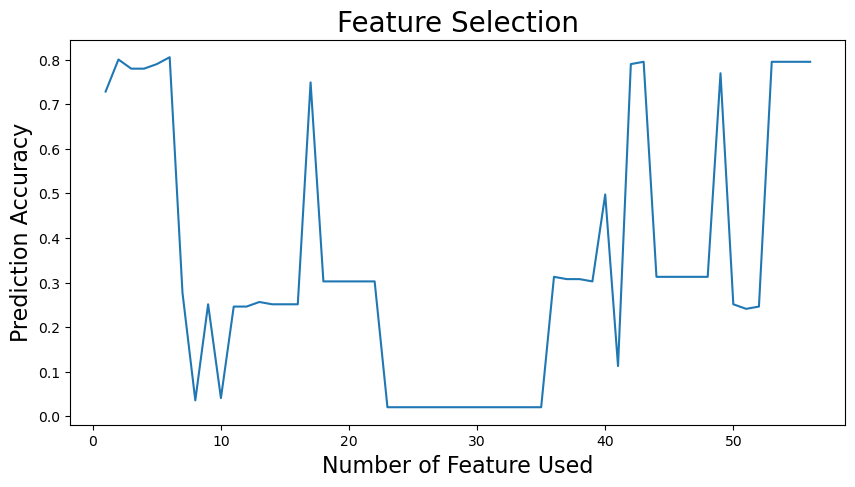

In [48]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selection', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [49]:
ks.where(ks==ks.max()).dropna()

6    0.805128
dtype: float64

In [58]:
# Logistic Regression
#SelectKBest: SelectKBest is a feature selection method in scikit-learn that selects the top k features based on a given scoring function
#k=2: This parameter specifies the number of features to select.

sk = SelectKBest(chi2, k=6)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.8259911894273128 , Cross Validation Score : 0.7897435897435897


In [59]:
#Ada Boost Model
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

Ada Boost Model Score : 0.7070484581497798 , Cross Validation Score : 0.7128205128205128


In [60]:
#Stochastic Gradient Descent Model
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.6145374449339207 , Cross Validation Score : 0.5897435897435898
